# Analysis of Bike Sharing Rides
## by Osama Adel

## Investigation Overview

In this analysis, the effect of the age, the day of the week and hour of the day on rides' duration is investigated. Also, the effect of the user's type (Customer or Subscribers) and gender on the ride starting hour is also considered.

## Dataset Overview

The data consists of 183412 rides and 16 variables of 4646 bikes over the period of one month (from 1 Feb 2019 to 1 March 2019) from and to 329 stations in San Fransisco Bay area. The variables include the ride start and end times, ride duration, user's type, gender and birth year.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
df['log_duration_sec'] = np.log10(df['duration_sec'])
df['age'] = pd.datetime.now().year - df['member_birth_year']
df['start_hour'] = df['start_time'].dt.hour
df['end_hour'] = df['end_time'].dt.hour
df['start_dayOfWeek'] = df['start_time'].dt.dayofweek.map({0:'Monday', 1: 'Tuesday', 2:'Wednesday', 3: 'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'})
df['end_dayOfWeek'] = df['end_time'].dt.dayofweek.map({0:'Monday', 1: 'Tuesday', 2:'Wednesday', 3: 'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'})
df['start_dayOfWeek'] = df['start_dayOfWeek'].astype(pd.api.types.CategoricalDtype(categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], ordered=True))
df['end_dayOfWeek'] = df['end_dayOfWeek'].astype(pd.api.types.CategoricalDtype(categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], ordered=True))


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of Duration in Seconds

The distribution of the duration in seconds shows a highly right skewed distribution. When plotted on a log scale, it shows a nice normal distribution. The mean is shown at the red vertical line at 762 seconds.

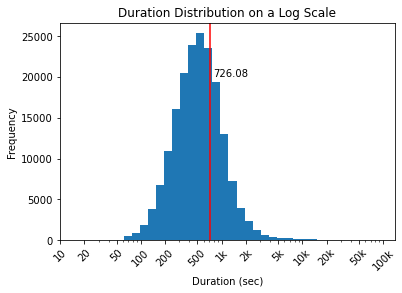

In [3]:
bins = 10 ** np.arange(1.785330, 4.931682 + 0.1, 0.1)
plt.hist(df['duration_sec'], bins=bins)
plt.xlabel('Duration (sec)')
plt.ylabel('Frequency')
ticks = [10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 1e4, 2e4, 5e4, 1e5]
labels = ['{}'.format(x) if x < 1000 else '{}k'.format(int(x//1000)) for x in ticks]
plt.xscale('log')
plt.xticks(ticks=ticks, labels=labels, rotation=45)
plt.axvline(x=df['duration_sec'].mean(), color='red')
plt.text(x=df['duration_sec'].mean()+50, y=20000, s='{:.2f}'.format(df['duration_sec'].mean()));
plt.title('Duration Distribution on a Log Scale');

## Distribution of Rides Over Days of Week

The following figure shows the distribution of the rides over the days of week. As shown, the number of rides in Thursday (19% of all rides) is the highest in the week followed by Tuesday (around 17%) then Wedensday (around 16%). Also, it is clear that the number of rides are at minimum in the weekends (Saturday and Sunday at around 8%).

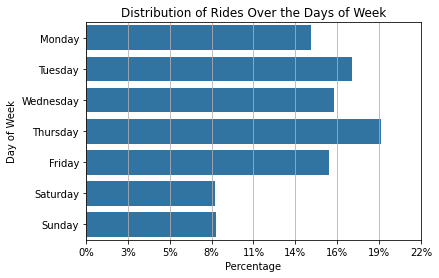

In [4]:
sb.countplot(data=df, y='start_dayOfWeek', color=sb.color_palette()[0]);
plt.xlabel('Percentage')
plt.ylabel('Day of Week')
ax = plt.gca();
ticks = ax.get_xticks()
labels = ['{}%'.format(round(x * 100 / len(df))) for x in ticks]
plt.xticks(ticks, labels)
plt.grid(axis='x');
plt.title('Distribution of Rides Over the Days of Week');

## Birth Year Distribution

The distribution is left skewed which means more of the younger generations from 1980 to 2000 are using the bike sharing service than older generations. It is also clear that some values are anomalies, with birth year before 1920, which means people with ages over 100 years.

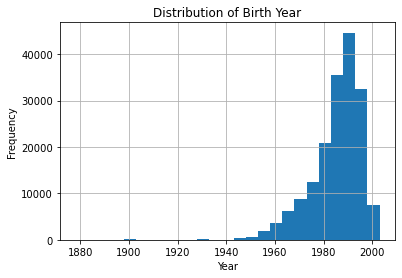

In [5]:
bins = np.arange(df['member_birth_year'].min(), df['member_birth_year'].max()+5, 5)
plt.hist(df['member_birth_year'], bins=bins)
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.grid();
plt.title('Distribution of Birth Year');

## Ratio of Customers and Subscribers

As shown in the figure, the Subscribers account for more than 87% of all users while Customers are slightly below 11%.

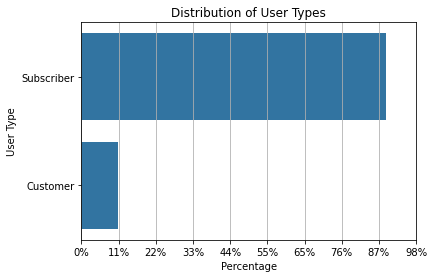

In [6]:
sb.countplot(data=df, y='user_type', color=sb.color_palette()[0], order=['Subscriber', 'Customer']);
ax = plt.gca();
ticks = ax.get_xticks()
labels = ['{}%'.format(round(x * 100 / len(df))) for x in ticks]
plt.xticks(ticks, labels)
plt.grid(axis='x')
plt.xlabel('Percentage')
plt.ylabel('User Type');
plt.title('Distribution of User Types');

## Distribution of Gender

The figure below shows that about 70% of the users are males while only 22% are females. Around 2-3% of users chose others as their gender.

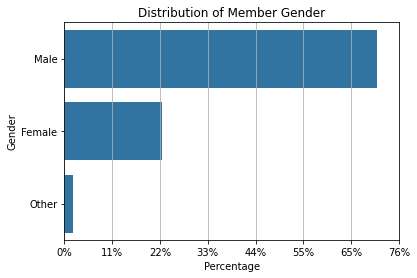

In [7]:
sb.countplot(data=df, y='member_gender', color=sb.color_palette()[0], order=['Male', 'Female', 'Other']);
ax = plt.gca();
ticks = ax.get_xticks()
labels = ['{}%'.format(round(x * 100 / len(df))) for x in ticks]
plt.xticks(ticks, labels)
plt.grid(axis='x')
plt.xlabel('Percentage')
plt.ylabel('Gender');
plt.title('Distribution of Member Gender');

## Effect of Age on Ride Duration

The figure shows that older users (above 40 years old) in general have shorter rides than younger generations (20-40 years old).

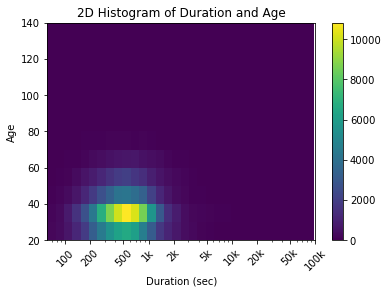

In [8]:
xbins = 10 ** np.arange(df['log_duration_sec'].min(), df['log_duration_sec'].max()+0.1, 0.1)
ybins = np.arange(20, 140+10, 10)
plt.hist2d(x=df['duration_sec'], y=df['age'], bins = [xbins, ybins])
plt.xlabel('Duration (sec)')
plt.ylabel('Age')
plt.xscale('log')
ticks = [100, 200, 500, 1000, 2000, 5000, 1e4, 2e4, 5e4, 1e5]
labels = ['{}k'.format(int(x//1000)) if x > 500 else '{}'.format(x) for x in ticks]
plt.xticks(ticks, labels, rotation=45)
plt.colorbar()
plt.title('2D Histogram of Duration and Age');

## Effect of Hour of the Day on Ride Duration

As shown in the figure, most of rides take place from 6-10 AM and from 4-8 PM. However, the duration of theses rides have the same distribution from 200-1000 seconds.

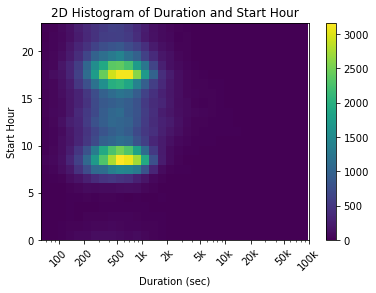

In [9]:
xbins = 10 ** np.arange(df['log_duration_sec'].min(), df['log_duration_sec'].max()+0.1, 0.1)
ybins = np.arange(df['start_hour'].min(), df['start_hour'].max()+1, 1)
plt.hist2d(x=df['duration_sec'], y=df['start_hour'], bins=[xbins, ybins])
plt.xlabel('Duration (sec)');
plt.ylabel('Start Hour')
plt.xscale('log')
ticks = [100, 200, 500, 1000, 2000, 5000, 1e4, 2e4, 5e4, 1e5]
labels = ['{}k'.format(int(x//1000)) if x > 500 else '{}'.format(x) for x in ticks]
plt.xticks(ticks, labels, rotation=45)
plt.colorbar();
plt.title('2D Histogram of Duration and Start Hour');

## Starting Hour per Day of Week

It is clear that the distribution of rides over the day changes in the week ends, instead of two peaks from 6-10 AM and 4 to 8 PM, there is a normal distribution of the day with a peak at around 2-3 PM.

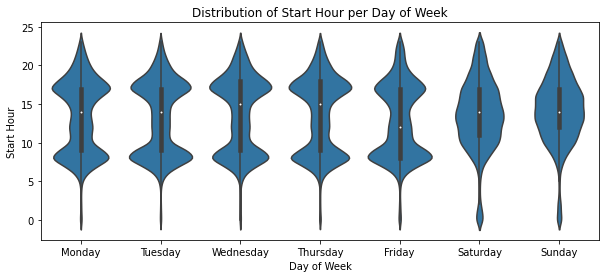

In [10]:
plt.figure(figsize=(10,4))
sb.violinplot(data=df, x='start_dayOfWeek', y='start_hour', color=sb.color_palette()[0])
plt.xlabel('Day of Week')
plt.ylabel('Start Hour');
plt.title('Distribution of Start Hour per Day of Week');

## Effect of User Type on the Duration Over the Week

As shown in the figure, Customers in general take longer rides than Subscribers especially in weekends.

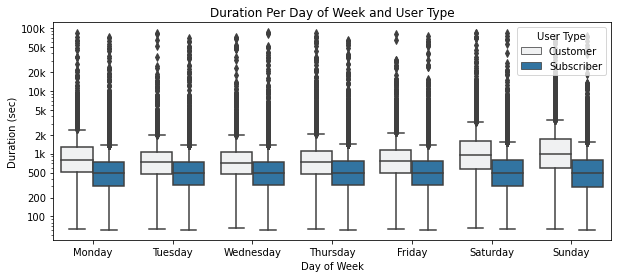

In [14]:
plt.figure(figsize=(10,4))
sb.boxplot(data=df, x='start_dayOfWeek', y='duration_sec', hue='user_type', color=sb.color_palette()[0]);
plt.yscale('log')
ticks = [100, 200, 500, 1000, 2000, 5000, 1e4, 2e4, 5e4, 1e5]
labels = ['{}k'.format(int(x//1000)) if x > 500 else '{}'.format(x) for x in ticks]
plt.yticks(ticks, labels)
plt.xlabel('Day of Week')
plt.ylabel('Duration (sec)');
plt.legend(title='User Type', loc='upper right');
plt.title('Duration Per Day of Week and User Type');

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!